# Apeworx Setup

In [1]:
from ape import accounts, chain, Contract, networks, project
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

/Users/will/.pyenv/versions/3.8.16/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/will/.pyenv/versions/3.8.16/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
You should consider upgrading via the '/Users/will/.pyenv/versions/3.8.16/bin/python3.8 -m pip install --upgrade pip' command.


In [2]:
networks.parse_network_choice('ethereum:local:foundry').__enter__()

INFO: Connecting to existing 'anvil' process.


<foundry chain_id=31337>

In [3]:
project_root = Path.cwd().parent

# Initialize Project Compilation
project.contracts
hyperdrive_user = accounts.test_accounts.generate_test_account()

# Give user 1 eth balance
hyperdrive_user.balance += int(1e18)

# Instantiate Contract Instances
base_ERC20 = project.IERC20Mint.at("0x5fbdb2315678afecb367f032d93f642f64180aa3")
hyperdrive = project.IHyperdrive.at("0x9fe46736679d2d9a65f0992f2272de9f3c7fa6e0")

# get current block
current_block = chain.blocks[-1].number
print(current_block)
pool_info = [hyperdrive.getPoolInfo().__dict__]
pool_info[0]["block_number_"] = current_block

def open_longs():
    # with notation avoids passing in sender each time
    with accounts.use_sender(hyperdrive_user):
        # Mint 1 million DAI
        base_ERC20.mint(int(1e24))

        # Approve ERC20 usage by contract
        base_ERC20.approve(hyperdrive, int(1e24))

        pool_info = hyperdrive.getPoolInfo().__dict__

        # Open Long on 10,000 DAI
        tx_receipt = hyperdrive.openLong(int(1e21), int(1e21), hyperdrive_user, False)
        pt_balance = tx_receipt.return_value
        
        print("user input %s base" %(int(1e21)))
        print("user received %s PTs" %(pt_balance))
        
        current_block = chain.blocks[-1]
        pool_info["block_number_"] = current_block.number

        return pool_info


for x in range(50):        
    pool_info += [open_longs()]



INFO: Compiling 'IMultiToken.sol'.
INFO: Compiling 'IHyperdrive.sol'.
INFO: Compiling 'IERC20.sol'.
INFO: Compiling 'IERC20Mint.sol'.
INFO: Compiling 'IMockHypedrive.sol'.
2
INFO: Confirmed 0x5817e10a9f89dd1f7b6cd81a1d245fd31879e37d6e8b8955e0d1ec51421aa930 (total fees paid = 142552094387682)
INFO: Confirmed 0x34e776d74b5fd1830bf1f587e7ee193c3d79bfaa5a3b642c3325cd2246484213 (total fees paid = 125430305953076)
INFO: Confirmed 0xdc8be8608f8592f61597217fd17267ef2de0170d3d2991f3ce1d4e6845a80814 (total fees paid = 402164636733375)
user input 1000000000000000000000 DAI
user received 1043811711760524252937 PTs
INFO: Confirmed 0x07c28c709155e614e1fed7e791daf56e6c1f1430ff919be35b8f00e1abee2b7b (total fees paid = 85511375241396)
INFO: Confirmed 0x2bf64c40ed759ee2ce2e0fa0e313310a8a72e304e6c5b9e850e5fcd282889769 (total fees paid = 72265719490641)
INFO: Confirmed 0x7ef8aae0ce84d225de5d0ec79a2aef0cd789e087e0cb481f0cda042d237e29a6 (total fees paid = 329460746454375)
user input 1000000000000000000000 D

INFO: Confirmed 0x03157b537a4b82f7c09036d96fb98b6a12b28bf43fa9fab4af6786c530e9dd01 (total fees paid = 272614802305650)
user input 1000000000000000000000 DAI
user received 1033636962835041274755 PTs
INFO: Confirmed 0xcc7a1ffbe614c657b5e46a9100b4daf4115332d1ad44c7cbab0e8559c93b3c0c (total fees paid = 67209997766750)
INFO: Confirmed 0x6b4c6dd27a8364a7b778a3eb368650b33d9daea2987b3eb673b8cfd317a56af4 (total fees paid = 58356638313699)
INFO: Confirmed 0xece2adf65c854e36c1f11d1daef0efc6205b2b9fc8584fda3d312416dd8a2be9 (total fees paid = 272593494619200)
user input 1000000000000000000000 DAI
user received 1033098011911925327048 PTs
INFO: Confirmed 0x1d0d2355bce5cc4fecf1fc586d7645deaf24b6f6b6e0df3c02a5a3f007423dc8 (total fees paid = 67205395143132)
INFO: Confirmed 0x1d9fe928372b678a3095a50000b75874daebbd69bbdd1f42a5c082139f5411ca (total fees paid = 58353140325134)
INFO: Confirmed 0x4dffc423e606e3b4dc8491f3da308e980ed51441146f22f1ef7f90ee65ab7d5b (total fees paid = 272579193103050)
user input 10

INFO: Confirmed 0x7e99b1d52cf6036a53c85584d9fceff78546167e4d5343eb392adee61d1eec2e (total fees paid = 272550032706000)
user input 1000000000000000000000 DAI
user received 1023762415115304289878 PTs
INFO: Confirmed 0x921ae98be7efb8729e5315e72c67177382bf94e9a2b6f5cdaec9d0ae51ce144d (total fees paid = 67196007055580)
INFO: Confirmed 0x4ba34d52cc8ca6cc0c04de29f2d02ab57daed6e15df6e84a3a9054deeb42212f (total fees paid = 58346005338659)
INFO: Confirmed 0x80227fff14d28e1d30898c08e21200a5ef216e1a936495fd76b9dd2a4624f642 (total fees paid = 272550021804000)
user input 1000000000000000000000 DAI
user received 1023261397026371455859 PTs
INFO: Confirmed 0x0c13ac8459ebf0b4498ad7709ae5f4a433c8750f552b1d30f4fe3fbb28d694c9 (total fees paid = 67196004703720)
INFO: Confirmed 0x42fa5d670230c39979777dc1aa1719fc72d6b90574dc1e3e2e9d202b1a82d5ba (total fees paid = 58346003559106)
INFO: Confirmed 0x1df96116086059a414a161b46c0ce6ff95a717770b2138bd3ee27fe53c7185ac (total fees paid = 272550014445150)
user input 10

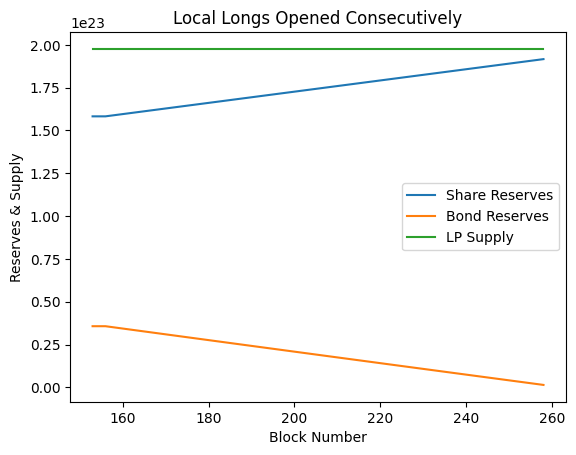

In [89]:
df = pd.DataFrame(pool_info)

plt.figure(1)
plt.plot(df['block_number_'], df['shareReserves_'], label='Share Reserves')
plt.plot(df['block_number_'], df['bondReserves_'], label='Bond Reserves')
plt.plot(df['block_number_'], df['lpTotalSupply'], label='LP Supply')
plt.xlabel('Block Number')
plt.ylabel('Reserves & Supply')
plt.title('Local Longs Opened Consecutively')
plt.legend()
plt.show()
